In [1]:
import numpy as np
import scipy.io
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
import pandas as pd
from ipynb.fs.full.utils import *

In [2]:
shot_scale_csv = pd.read_csv('E:/FPP_files_and_codes/FPP_files/shot_scale_labels/corrected_shot_scale_predictions.csv')

In [4]:
shot_scale_labels = np.array(shot_scale_csv['human_pred'])

In [5]:
set(shot_scale_labels)

{'CS', 'LS', 'MS', 'Unclear'}

In [6]:
shot_scale_labels.shape

(3655,)

In [7]:
CS_seconds = np.where(shot_scale_labels == 'CS')[0]
LS_seconds = np.where(shot_scale_labels == 'LS')[0]
MS_seconds = np.where(shot_scale_labels == 'MS')[0]

In [8]:
print(CS_seconds.shape)
print(MS_seconds.shape)
print(LS_seconds.shape)

(1856,)
(833,)
(463,)


In [9]:
delay = 5
shifted_CS_seconds = (CS_seconds + delay)%3655
shifted_MS_seconds = (MS_seconds + delay)%3655
shifted_LS_seconds = (LS_seconds + delay)%3655

In [10]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [11]:
mean_FPPs_activity.shape

(5, 3655)

In [12]:
mean_activity_each_FPP_in_different_shot_scales = np.zeros((5,3))
SEM_mean_activity_each_FPP_in_different_shot_scales = np.zeros((5,3))

for i in range(5):
    # Calculate mean and standard deviation activity for each FPP
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    FPP_MS = FPP_activity[shifted_MS_seconds]

    FPP_LS = FPP_activity[shifted_LS_seconds]

    means = [np.mean(FPP_CS), np.mean(FPP_MS), np.mean(FPP_LS)]
    mean_activity_each_FPP_in_different_shot_scales[i] = means

    SEMs = [stats.sem(FPP_CS), stats.sem(FPP_MS), stats.sem(FPP_LS)]
    SEM_mean_activity_each_FPP_in_different_shot_scales[i] = SEMs



In [13]:
mean_activity_each_FPP_in_different_shot_scales.T

array([[-0.0624447 ,  0.00612737,  0.01183942, -0.0014392 , -0.00584363],
       [ 0.04243427,  0.06767031,  0.06137804,  0.062759  ,  0.06519675],
       [ 0.16291888,  0.06767903,  0.08840476,  0.10389913,  0.1113595 ]])

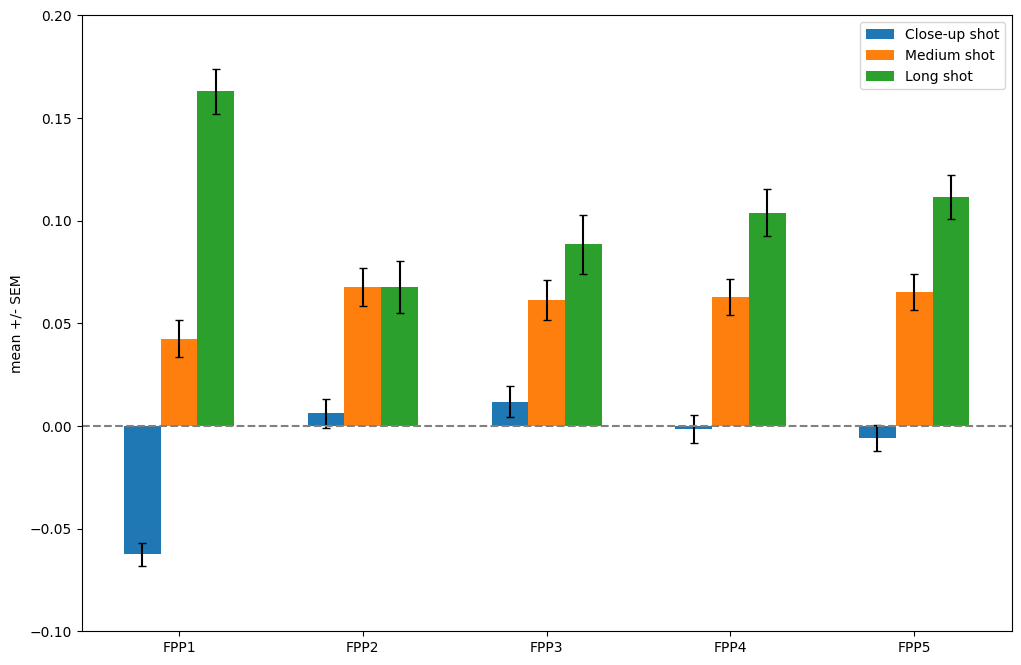

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_labels = ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5']
bar_width = 0.2

index = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(index - bar_width, mean_activity_each_FPP_in_different_shot_scales.T[0], bar_width,  yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[0], label='Close-up shot', capsize=3)

bar2 = ax.bar(index, mean_activity_each_FPP_in_different_shot_scales.T[1], bar_width,  yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[1], label='Medium shot', capsize=3)


bar3 = ax.bar(index + bar_width, mean_activity_each_FPP_in_different_shot_scales.T[2], bar_width, yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[2], label='Long shot', capsize=3)

ax.axhline(0, color='gray', linestyle='--')

ax.set_ylim(-0.1,0.2)
ax.set_ylabel('mean +/- SEM')
ax.set_xticks(index)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()


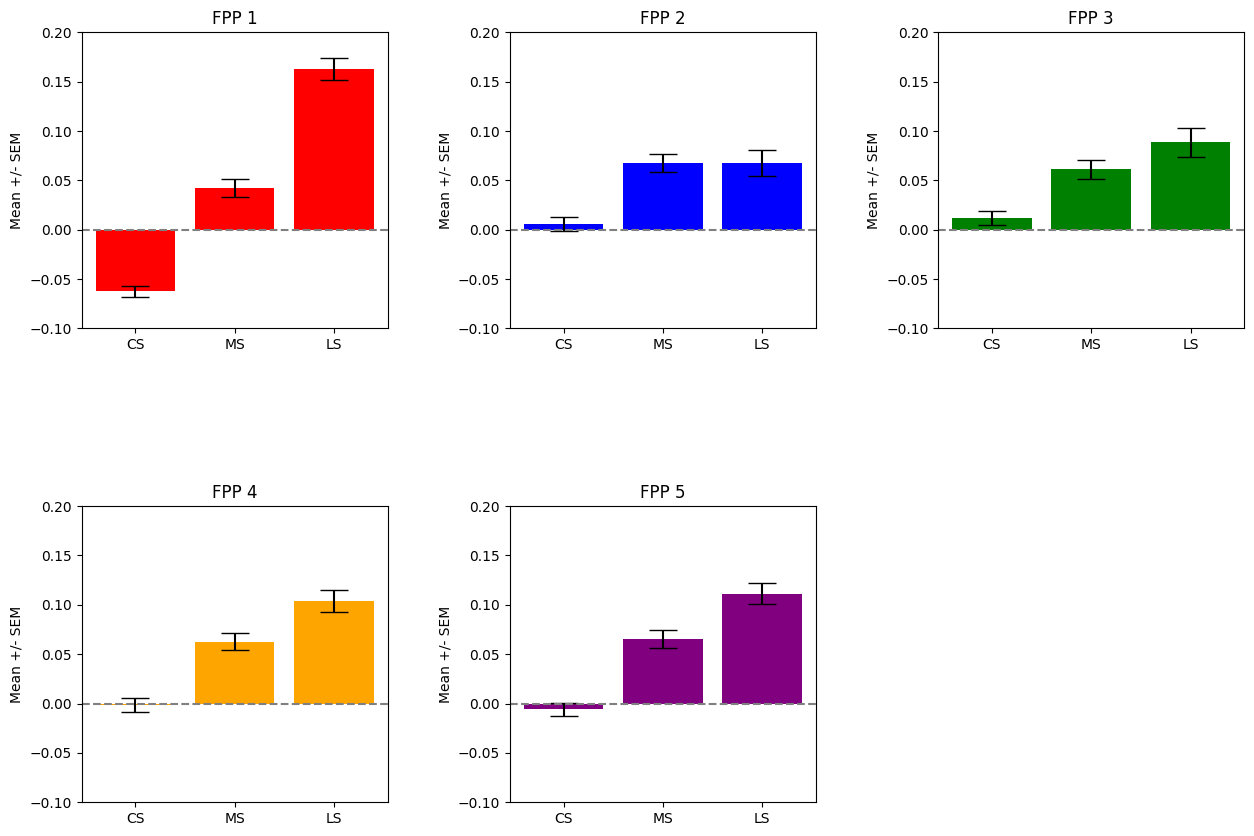

In [21]:
MeanActivityNonBlankFramesInEahcshot = np.zeros((5,3))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, ax in enumerate(axs.flat):
    # Calculate mean and standard deviation
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    FPP_MS = FPP_activity[shifted_MS_seconds]

    FPP_LS = FPP_activity[shifted_LS_seconds]

    means = [np.mean(FPP_CS), np.mean(FPP_MS), np.mean(FPP_LS)]
    
    MeanActivityNonBlankFramesInEahcshot[i] = means

    SEMs = [stats.sem(FPP_CS), stats.sem(FPP_MS), stats.sem(FPP_LS)]

    labels = ['CS', 'MS', 'LS']

    # Plot bar with error bars
    ax.bar(labels, means, yerr=SEMs, color=colors[i], capsize=10)
#     ax.bar(0, mean, yerr=std, color=colors[i], capsize=10)
    ax.set_title(f'FPP {i+1}')
#     ax.set_xticks([])
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_ylim(-0.1,0.2)
    ax.set_ylabel('Mean +/- SEM')
    if i == 4:
        break
axs[1, 2].axis('off')
# Adjust layout
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()

In [20]:
mean_FPPs_activity

array([[ 0.11503519,  0.03718783,  0.06390971, ..., -0.09333008,
        -0.04491226, -0.01514777],
       [ 0.08077597, -0.02147286,  0.03186865, ..., -0.16496121,
        -0.13001685, -0.07163416],
       [-0.04819481, -0.19603622, -0.02925085, ..., -0.48429933,
        -0.47145943, -0.40271844],
       [-0.12274933, -0.24787016, -0.14828766, ..., -0.43621268,
        -0.43554419, -0.40134424],
       [-0.31982471, -0.23964374, -0.09059742, ..., -0.37779491,
        -0.33173222, -0.25312564]])

# exclude face/body/animal frames

In [54]:
import pandas as pd

file_path = 'D:/FPP_project_analysis/3_Place_confirmation_analysis/Frames_barplot/GPTLabelingFinalize.csv'

RelabelDataframe = pd.read_csv(file_path)

In [55]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [56]:
labels_list_1 = []
with open("D:/FPP_project_analysis/3_Place_confirmation_analysis/Frames_barplot/Movie_labels/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("D:/FPP_project_analysis/3_Place_confirmation_analysis/Frames_barplot/Movie_labels/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("D:/FPP_project_analysis/3_Place_confirmation_analysis/Frames_barplot/Movie_labels/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("D:/FPP_project_analysis/3_Place_confirmation_analysis/Frames_barplot/Movie_labels/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [57]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [73]:
FB = []
k = 0
for i in RelabeldFrames:
    if (('Face' in i) or ('Body' in i)):
        FB.append(k)
    k += 1
print(len(FB))

2399


In [74]:
FB = np.array(FB)

In [75]:
FB_CS_seconds = np.intersect1d(FB, CS_seconds)
FB_MS_seconds = np.intersect1d(FB, MS_seconds)
FB_LS_seconds = np.intersect1d(FB, LS_seconds)

In [79]:
FB_CS_seconds.shape

(1563,)

In [77]:
delay = 5
Shifted_FB_CS_seconds = (FB_CS_seconds + delay)%3655
Shifted_FB_MS_seconds = (FB_MS_seconds + delay)%3655
Shifted_FB_LS_seconds = (FB_LS_seconds + delay)%3655

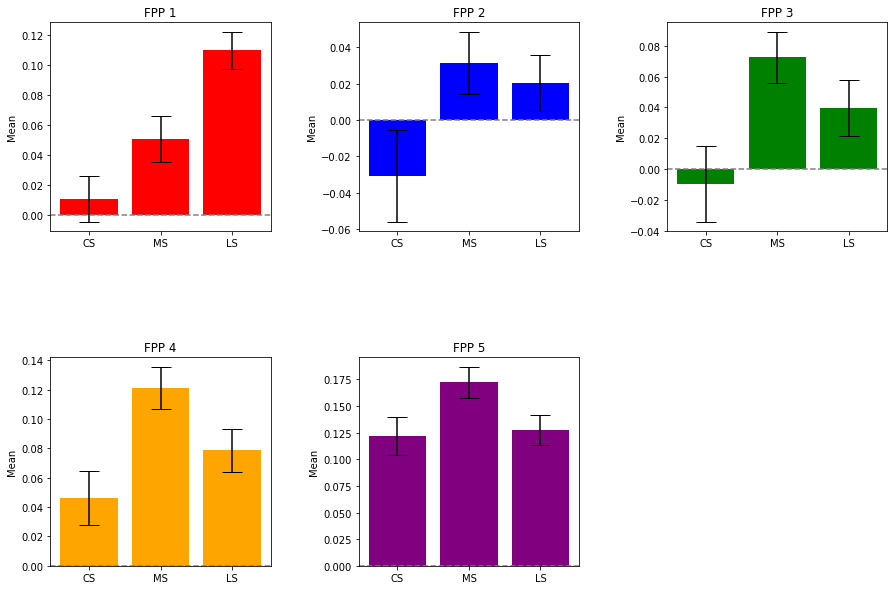

In [78]:
MeanActivityNonBlankFramesInEahcshot = np.zeros((5,3))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, ax in enumerate(axs.flat):
    # Calculate mean and standard deviation
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[Shifted_place_CS_seconds]

    FPP_MS = FPP_activity[Shifted_place_MS_seconds]

    FPP_LS = FPP_activity[Shifted_place_LS_seconds]

    means = [np.mean(FPP_CS), np.mean(FPP_MS), np.mean(FPP_LS)]
    
    MeanActivityNonBlankFramesInEahcshot[i] = means

    SEMs = [stats.sem(FPP_CS), stats.sem(FPP_MS), stats.sem(FPP_LS)]

    labels = ['CS', 'MS', 'LS']

    # Plot bar with error bars
    ax.bar(labels, means, yerr=SEMs, color=colors[i], capsize=10)
#     ax.bar(0, mean, yerr=std, color=colors[i], capsize=10)
    ax.set_title(f'FPP {i+1}')
#     ax.set_xticks([])
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_ylabel('Mean')
    if i == 4:
        break
axs[1, 2].axis('off')
# Adjust layout
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()